In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import os 
from sklearn.tree import plot_tree 

In [3]:
os.chdir(r"D:\Karan\ML")

In [4]:
os.listdir()

['bank.xlsx',
 'bank1.csv',
 'bank_xgb.csv',
 'corr.csv',
 'corr1.csv',
 'FeatImp.xlsx',
 'Feature_imp.csv']

In [5]:
banks=pd.read_excel('bank.xlsx', sheet_name="bank") 

In [6]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
banks["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [8]:
banks["job"].nunique()

12

In [9]:
banks["job"].value_counts(dropna=False)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [10]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Univariate Analysis 

<AxesSubplot:>

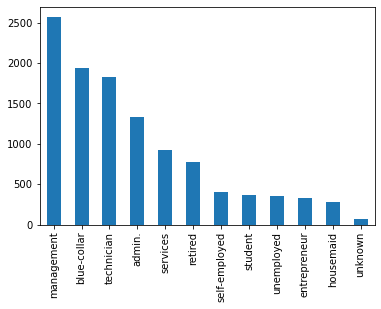

In [11]:
banks["job"].value_counts().plot(kind="bar")

In [12]:
banks.shape

(11162, 17)

In [13]:
banks["job"]=banks["job"].replace(["management", "admin."], "White-collar")

banks["job"]=banks["job"].replace(["services", "housemaid"], "Pink-collar")

banks["job"]=banks["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")

banks["job"]=banks["job"].replace(["self-employed", "entrepreneur"], "self-depend")

In [14]:
banks["job"].value_counts()

White-collar    3900
blue-collar     1944
technician      1823
Others          1565
Pink-collar     1197
self-depend      733
Name: job, dtype: int64

In [15]:
banks["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [16]:
banks["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [17]:
banks["default"].value_counts() 

no     10994
yes      168
Name: default, dtype: int64

In [18]:
banks["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [19]:
banks.drop( columns=["contact"], inplace=True)

In [20]:
banks.drop(columns=["month", "day"], inplace=True) 

In [21]:
banks["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [22]:
banks["poutcome"]=banks["poutcome"].replace(["unknown", "other"], "others")

In [23]:
banks["poutcome"].value_counts()

others     8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [24]:
banks.loc[banks["pdays"]==-1,"pdays"]=999
banks["recent_pdays"]=1/banks["pdays"]
banks.drop(columns=["pdays"], inplace=True)

In [25]:
banks.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

In [26]:
banks["deposit_cat"]=banks["deposit"].map({"yes":1, "no":0})  # np.where(banks["deposit"]=="yes", 1,0)
banks.drop(columns=["deposit"], inplace=True)
banks 

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,1042,1,0,others,0.001001,1
1,56,White-collar,married,secondary,no,45,no,no,1467,1,0,others,0.001001,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,others,0.001001,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,579,1,0,others,0.001001,1
4,54,White-collar,married,tertiary,no,184,no,no,673,2,0,others,0.001001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,0,others,0.001001,0
11158,39,Pink-collar,married,secondary,no,733,no,no,83,4,0,others,0.001001,0
11159,32,technician,single,secondary,no,29,no,no,156,2,0,others,0.001001,0
11160,43,technician,married,secondary,no,0,no,yes,9,2,5,failure,0.005814,0


In [27]:
banks.head() 

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,1042,1,0,others,0.001001,1
1,56,White-collar,married,secondary,no,45,no,no,1467,1,0,others,0.001001,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,others,0.001001,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,579,1,0,others,0.001001,1
4,54,White-collar,married,tertiary,no,184,no,no,673,2,0,others,0.001001,1


<AxesSubplot:xlabel='age', ylabel='balance'>

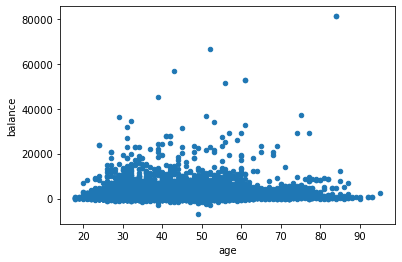

In [28]:
banks.plot(kind="scatter",x='age', y="balance")

<AxesSubplot:xlabel='age', ylabel='duration'>

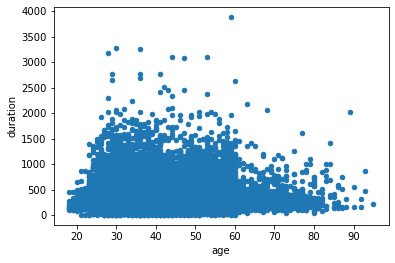

In [29]:
banks.plot(kind="scatter",x='age', y="duration")

In [30]:
# banks.plot(kind="bar",x='education', y=)

In [31]:
banks.shape

(11162, 14)

In [32]:
bank1=pd.get_dummies(banks, 
                     columns=["job", "marital","education", "default", "housing","loan", "poutcome"],
              drop_first=True)

In [33]:
bank1.shape

(11162, 22)

In [34]:
bank1.dtypes

age                      int64
balance                  int64
duration                 int64
campaign                 int64
previous                 int64
recent_pdays           float64
deposit_cat              int64
job_Pink-collar          uint8
job_White-collar         uint8
job_blue-collar          uint8
job_self-depend          uint8
job_technician           uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_yes              uint8
housing_yes              uint8
loan_yes                 uint8
poutcome_others          uint8
poutcome_success         uint8
dtype: object

In [35]:
# cr=bank1.corr() 

In [36]:
# bank1.describe(percentiles=[.95, .96, .97, .98, .99]).T

In [37]:
# cr.to_csv("corr1.csv")

In [38]:
# bank1.to_csv("bank1.csv")

In [39]:
bank1.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'deposit_cat', 'job_Pink-collar', 'job_White-collar', 'job_blue-collar',
       'job_self-depend', 'job_technician', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_others', 'poutcome_success'],
      dtype='object')

In [40]:
X=bank1.drop(columns=["deposit_cat"])
y=bank1["deposit_cat"] 

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train ,y_train)

print("Train_accuracy" , dt1.score(X_train, y_train))
print("Test_accuracy" , dt1.score(X_test, y_test))


Train_accuracy 1.0
Test_accuracy 0.7218987908643081


In [77]:
# help(dt1)

In [97]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(X_train ,y_train)

print("Train_accuracy" , dt1.score(X_train, y_train))
print("Test_accuracy" , dt1.score(X_test, y_test))

Train_accuracy 1.0
Test_accuracy 0.7348858038513211


In [44]:
# max_depth, min_samples_split, min_samples_leaf, creterion 

In [59]:
dt2=DecisionTreeClassifier(max_depth=12)
dt2.fit(X_train ,y_train)

print("Train_accuracy" , dt2.score(X_train, y_train))
print("Test_accuracy" , dt2.score(X_test, y_test))

Train_accuracy 0.8966289618098331
Test_accuracy 0.7787729511867443


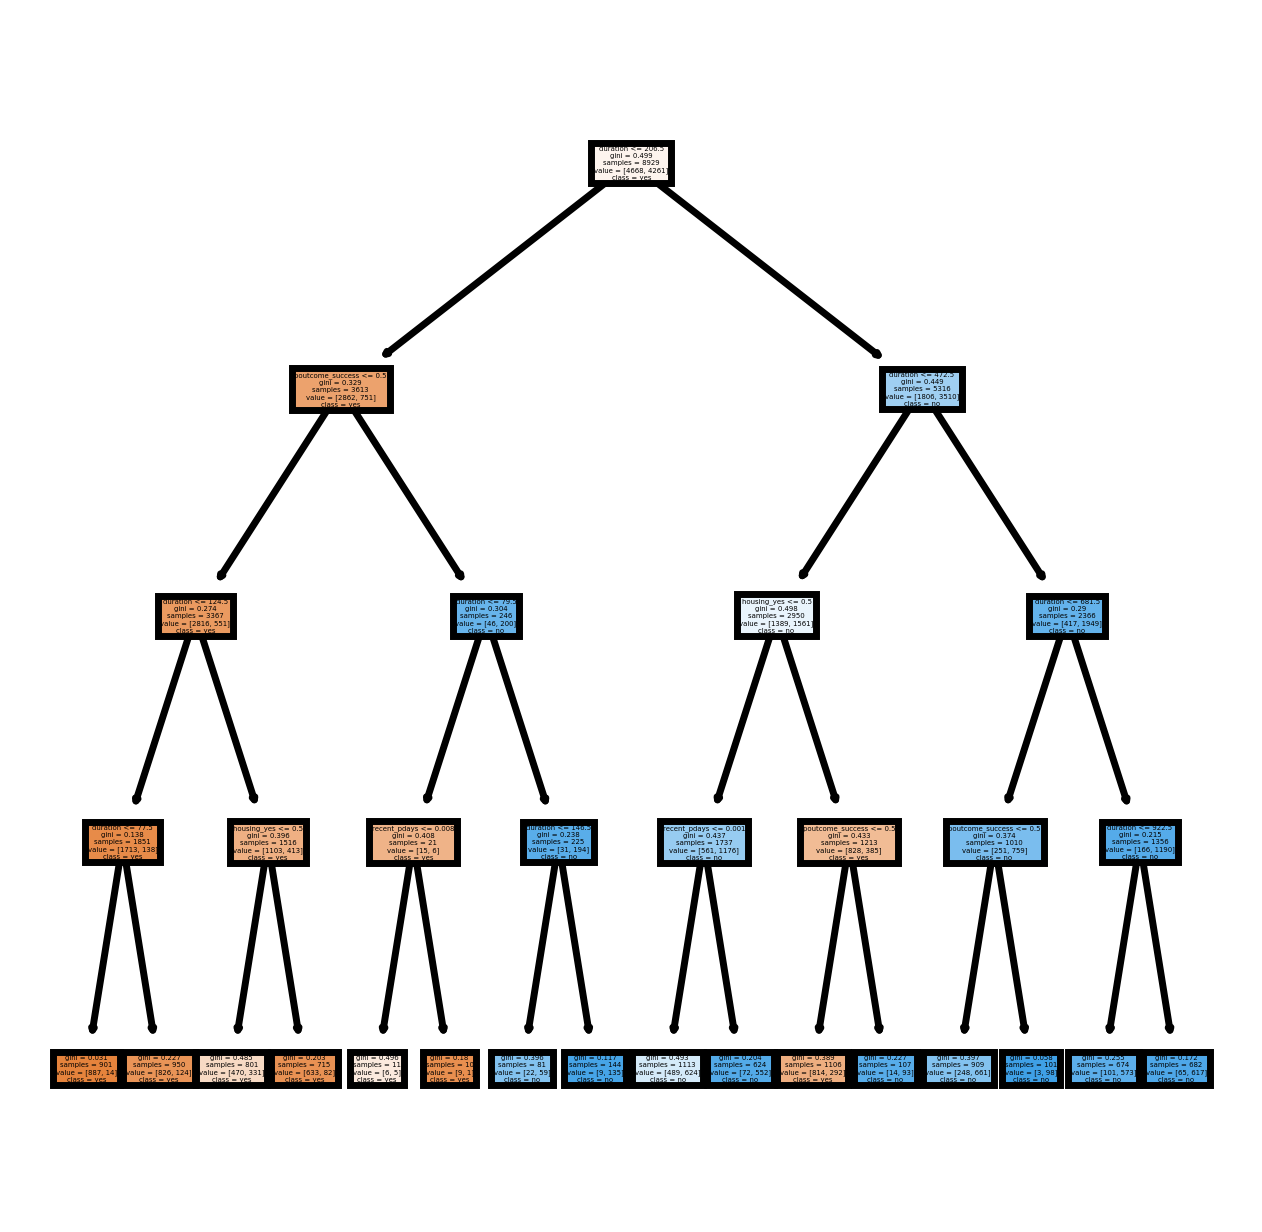

In [100]:
from sklearn.tree import plot_tree

fn=X_train.columns

cn=["yes","no"] 

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [101]:
from sklearn import tree 
rules=tree.export_text(dt2, feature_names=X_train.columns.to_list())

In [102]:
print(rules)

|--- duration <= 206.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 124.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  77.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  124.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- housing_yes >  0.50
|   |   |   |   |--- class: 0
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 79.50
|   |   |   |--- recent_pdays <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- recent_pdays >  0.01
|   |   |   |   |--- class: 0
|   |   |--- duration >  79.50
|   |   |   |--- duration <= 146.50
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  146.50
|   |   |   |   |--- class: 1
|--- duration >  206.50
|   |--- duration <= 472.50
|   |   |--- housing_yes <= 0.50
|   |   |   |--- recent_pdays <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- recent_pdays >  0.00
|   |   |   |   |--- class: 1
|   |   |--- housing_yes >  0

In [103]:
dt1=DecisionTreeClassifier(max_depth=20, criterion="entropy", min_samples_split=250)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))
print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.8218165528054653
Test accuracy: 0.8016121809225257


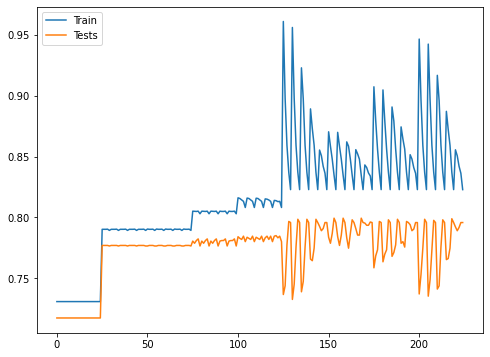

In [94]:
plt.figure(figsize=(8,6))
plt.plot(range(225), train_acc, label="Train")
plt.plot(range(225), test_acc, label="Tests")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params={"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv=DecisionTreeClassifier()
Gsearch_dt=GridSearchCV(estimator=dt_cv,param_grid=params, cv=10, 
             n_jobs=-1, verbose=1,scoring="accuracy")

Gsearch_dt.fit(X_train, y_train)

In [50]:
from sklearn.model_selection import GridSearchCV
params={"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv=DecisionTreeClassifier()
Gsearch_dt=GridSearchCV(estimator=dt_cv,param_grid=params, cv=10, 
             n_jobs=-1, verbose=1,scoring="accuracy")

Gsearch_dt.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [51]:
# help(GridSearchCV)

In [52]:
Gsearch_dt.best_score_

0.8119597366663486

In [53]:
Gsearch_dt.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 200}

In [54]:
from sklearn.model_selection import GridSearchCV
params={"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[100,150,200, 250,300,350],
       "min_samples_leaf":[5,10,20,50]}

dt_cv=DecisionTreeClassifier()
Gsearch_dt=GridSearchCV(estimator=dt_cv,param_grid=params, cv=10, 
             n_jobs=-1, verbose=1,scoring="accuracy")

Gsearch_dt.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [100, 150, 200, 250, 300, 350]},
             scoring='accuracy', verbose=1)

In [55]:
Gsearch_dt.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 200}

In [56]:
dt3=DecisionTreeClassifier(max_depth=15, criterion="gini", 
                           min_samples_split=200,
                          min_samples_leaf= 10)
dt3.fit(X_train, y_train)
print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.8267443162728189
Test accuracy: 0.800268696820421


In [60]:
pred_train=dt3.predict(X_train)  
pred_test=dt3.predict(X_test)

In [61]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4668
           1       0.82      0.82      0.82      4261

    accuracy                           0.83      8929
   macro avg       0.83      0.83      0.83      8929
weighted avg       0.83      0.83      0.83      8929



In [62]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1205
           1       0.78      0.79      0.78      1028

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



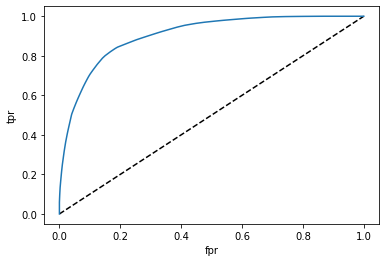

In [63]:
probs=dt3.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [64]:
metrics.roc_auc_score(y_train,probs) 

0.9035044786546721

In [65]:
cm=metrics.confusion_matrix(y_train,pred_train)
cm

array([[3895,  773],
       [ 774, 3487]], dtype=int64)

In [67]:
def evaluate(y,predY):
    cm=metrics.confusion_matrix(y,predY)
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    recall_1=(cm[1,1])/(cm[1,1]+cm[1,0])
    fg= pd.DataFrame({"Accuracy":pd.Series(accuracy),
                 "Recall_1":pd.Series(recall_1)})
    return fg

In [68]:
evaluate(y_train, pred_train)

,Accuracy,Recall_1
0,0.826744,0.818352


In [69]:
evaluate(y_test, pred_test)

,Accuracy,Recall_1
0,0.800269,0.788911


In [70]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile
    

In [71]:
p_train=profile_decile(X_train,y_train,dt3)

In [72]:
p_test=profile_decile(X_test,y_test,dt3)

In [116]:
p_train.to_csv("train_profile.csv")

In [117]:
os.getcwd()

'D:\\Training\\Imarticus\\PGA\\PGA17\\Week13'

In [75]:
X_train.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'job_Pink-collar', 'job_White-collar', 'job_blue-collar',
       'job_self-depend', 'job_technician', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_others', 'poutcome_success'],
      dtype='object')

In [74]:
dt3.feature_importances_

array([4.15764414e-02, 3.93182866e-02, 5.61487794e-01, 1.73153322e-02,
       2.75776626e-03, 7.37073681e-02, 8.94092487e-04, 5.63318270e-04,
       2.84196818e-03, 0.00000000e+00, 1.86798255e-04, 3.02786745e-04,
       2.59041005e-03, 0.00000000e+00, 2.43179284e-03, 0.00000000e+00,
       0.00000000e+00, 1.18328264e-01, 5.25163221e-03, 2.29150169e-03,
       1.28154447e-01])

In [87]:
fg=pd.DataFrame({"Var":X_train.columns, "Imp":dt3.feature_importances_}).sort_values(by=["Imp"], ascending=False)
imp=fg[fg["Imp"]>=0.002758]

In [90]:
imp["Var"].values

array(['duration', 'poutcome_success', 'housing_yes', 'recent_pdays',
       'age', 'balance', 'campaign', 'loan_yes', 'job_blue-collar'],
      dtype=object)

In [91]:
imp_feat=['duration', 'poutcome_success', 'housing_yes', 'recent_pdays',
       'age', 'balance', 'campaign', 'loan_yes', 'job_blue-collar']

In [94]:
xx1=X_train[imp_feat]
xx2=X_test[imp_feat]

In [95]:
dt4=DecisionTreeClassifier(max_depth=11, criterion="gini", 
                           min_samples_split=200,
                          min_samples_leaf= 10)
dt4.fit(xx1, y_train)
print("Train accuracy:", dt4.score(xx1,y_train))
print("Test accuracy:", dt4.score(xx2,y_test))

Train accuracy: 0.8276402732668832
Test accuracy: 0.8020600089565607


In [82]:
Train accuracy: 0.8267443162728189
Test accuracy: 0.800268696820421

### Random Forest Classifiers

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf1=RandomForestClassifier(n_estimators=200)

In [65]:
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.8087774294670846


In [50]:
# help(rf1)

In [66]:
rf1=RandomForestClassifier(n_estimators=200, max_depth=7)
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 0.83010415500056
Test Accuracy : 0.8069861173309449


In [45]:
X_train.shape

(8929, 21)

In [46]:
4*4*4*3*2*10

3840

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
fit_rf = RandomForestClassifier(random_state=42)

param_dist = {'max_depth':[7,10],
              'min_samples_split':[6,10],
              'n_estimators':[150,200],
#               'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [6, 10],
                         'n_estimators': [150, 200]},
             verbose=1)

In [99]:
# 4*4*4*2*3*2*10

In [70]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 150}

In [71]:
cv_rf.best_score_

0.8193516958855209

In [72]:
rf2=RandomForestClassifier(n_estimators=cv_rf.best_params_['n_estimators'],
                           max_depth=cv_rf.best_params_['max_depth'], 
                           criterion=cv_rf.best_params_["criterion"],
                           min_samples_split=cv_rf.best_params_["min_samples_split"],
                           max_features=cv_rf.best_params_["max_features"]
                          )
rf2.fit(X_train, y_train)
print("Train Accuracy :", rf2.score(X_train,y_train))
print("Test Accuracy :", rf2.score(X_test,y_test))

Train Accuracy : 0.8503751819912644
Test Accuracy : 0.8145991939095387


In [73]:
pred_train_rf=rf2.predict(X_train)
pred_test_rf=rf2.predict(X_test)

In [74]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4668
           1       0.83      0.86      0.85      4261

    accuracy                           0.85      8929
   macro avg       0.85      0.85      0.85      8929
weighted avg       0.85      0.85      0.85      8929



In [75]:
rf2.predict_proba(X_train)[:,1]

array([0.21264194, 0.52718168, 0.73340956, ..., 0.06660929, 0.20697004,
       0.75031317])

### Adaboost

In [41]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [42]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
# Create adaboost-decision tree classifer object
clf_ABC1 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.1,
                         random_state=0)

In [44]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

In [45]:
print("Train accuracy", clf_ABC1.score(x_train,y_train) )
print("Train accuracy", clf_ABC1.score(x_test,y_test) )

Train accuracy 0.792361966625602
Train accuracy 0.7895208240035826


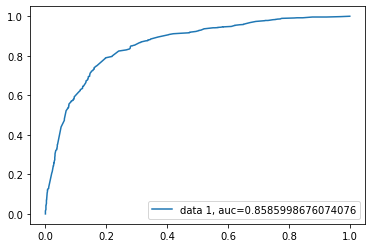

In [46]:
y_pred_proba = clf_ABC1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
[int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]

[50, 66, 83, 100, 116, 133, 150, 166, 183, 200]

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 50, stop = 5, num = 5)]


# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': [50, 70,100,150,200, 250,300,500],
               "learning_rate" : [1, 0.1, .01, 0.001]

#                'max_depth': [5,7,9,10, 12,14,16,18],
# #                'min_samples_split': [2,5,8,10, 20,50,70,75],
#                'min_samples_leaf': [2,5,8,10, 20,50,70,75]
               }
print(random_grid)

{'n_estimators': [50, 70, 100, 150, 200, 250, 300, 500], 'learning_rate': [1, 0.1, 0.01, 0.001]}


In [67]:
8*4*5

160

In [66]:
clf_ABC1 = AdaBoostClassifier(random_state=0)
ada_randomCV = RandomizedSearchCV(estimator = clf_ABC1, param_distributions = random_grid,
                                cv = 5,random_state=42, n_jobs=-1, verbose=1)
# Fit the random search model
ada_randomCV.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.9s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.1, 0.01, 0.001],
                                        'n_estimators': [50, 70, 100, 150, 200,
                                                         250, 300, 500]},
                   random_state=42, verbose=1)

In [68]:
ada_randomCV.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [69]:
# Create the random grid
gsearch_grid = {'n_estimators': [150,180,200, 250],
               "learning_rate" : [1, 0.1, .01]

#                'max_depth': [5,7,9,10, 12,14,16,18],
# #                'min_samples_split': [2,5,8,10, 20,50,70,75],
#                'min_samples_leaf': [2,5,8,10, 20,50,70,75]
               }
print(gsearch_grid)

{'n_estimators': [150, 180, 200, 250], 'learning_rate': [1, 0.1, 0.01]}


In [72]:
from sklearn.model_selection import GridSearchCV
gd_search=GridSearchCV(estimator = clf_ABC1,  param_grid=gsearch_grid,
                                cv = 5, n_jobs=-1, verbose=1)
gd_search.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.7s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [150, 180, 200, 250]},
             verbose=1)

In [73]:
gd_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [74]:
clf_ABC1 = AdaBoostClassifier(n_estimators=200,random_state=0, learning_rate=0.1)

In [75]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

In [77]:
print("Train accuracy", clf_ABC1.score(x_train,y_train) )
print("Test accuracy", clf_ABC1.score(x_test,y_test) )

Train accuracy 0.8170007839623699
Test accuracy 0.8114643976712942


In [47]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_ABC1),
                 'Precision Score': metrics.precision_score(y_test, y_pred_ABC1),
                 'Recall Score': metrics.recall_score(y_test, y_pred_ABC1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_ABC1),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_ABC1)})

model_abc1_report = models_report.append(tmp1, ignore_index = True)
model_abc1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.784832,0.798715,0.725681,0.789521,0.573516
